<a href="https://colab.research.google.com/github/jjdub82/...../blob/master/Stock_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1:  Gross Profit/Revenu =  profit margin
2:  SG&A
3:  R&D
4:  Depreciation
5:  Interest

In [ ]:
pip install pandas table plotting


In [ ]:
pip install yfinance

In [ ]:
pip install dataframe-image

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [ ]:
ticker = yf.Ticker(input("Enter Ticker\n"))

Enter Ticker
MMM


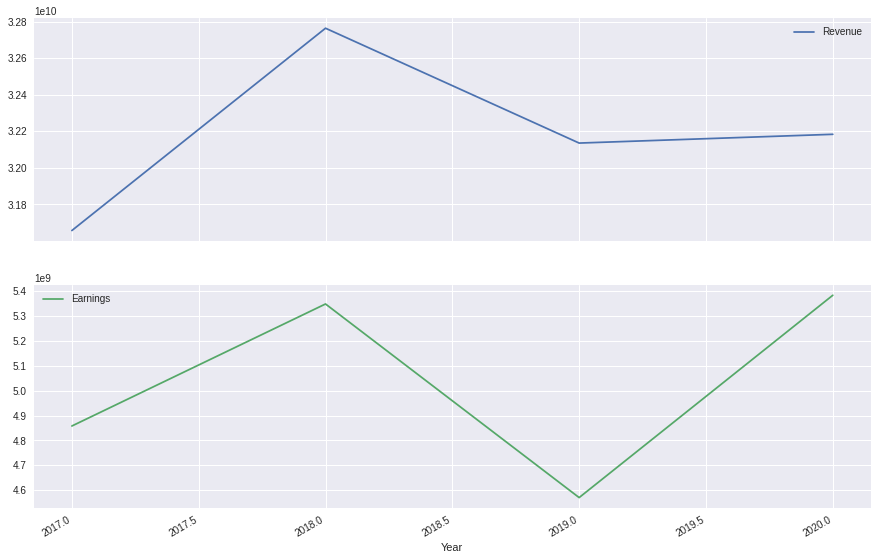

In [ ]:
ticker.earnings.plot(kind = 'line', figsize =(15,10), subplots=True);

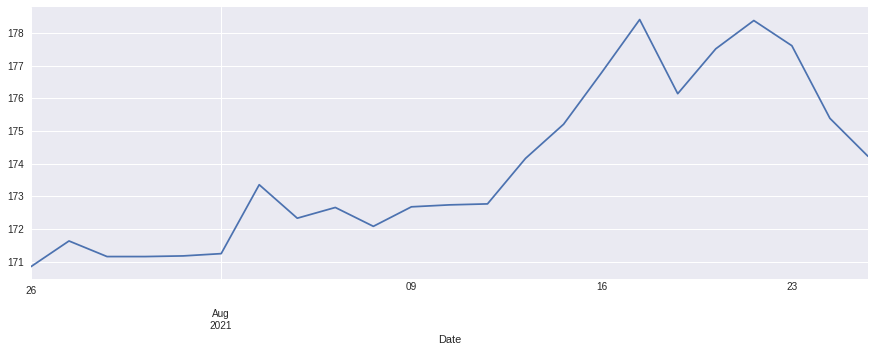

In [ ]:
closing_prices =ticker_hist['Close']
closing_prices.plot(kind = 'line', figsize = (15,5))
plt.xlabel = 'Date'
plt.ylabel = 'Closing Price'
plt.savefig('close price fig.jpg')

In [ ]:
ticker.recommendations.tail(20)

,Firm,To Grade,From Grade,Action
Date,,,,
2020-07-29 14:16:41,Credit Suisse,Outperform,,main
2020-09-16 12:33:26,Credit Suisse,Outperform,,main
2020-10-07 12:40:50,Gordon Haskett,Hold,Underperform,up
2020-10-13 12:03:35,Morgan Stanley,Equal-Weight,,main
2020-11-25 09:37:25,Morgan Stanley,Equal-Weight,,main
2021-01-07 13:17:16,B of A Securities,Underperform,Neutral,down
2021-01-12 13:44:39,Morgan Stanley,Equal-Weight,,main
2021-01-27 11:05:28,JP Morgan,Overweight,Neutral,up
2021-01-27 14:07:32,Credit Suisse,Outperform,,main


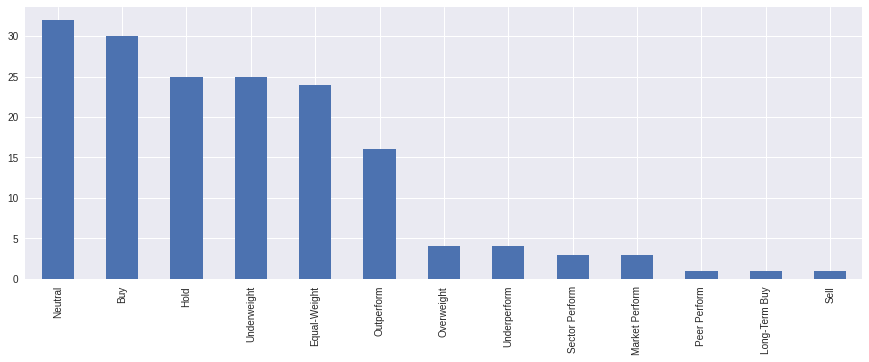

In [ ]:
ticker.recommendations['To Grade'].value_counts().plot(kind = 'bar', figsize=(15,5))

In [ ]:
ticker.info['grossMargins']

0.48703998

In [ ]:
gross_margin = ticker.info['grossMargins']
market_cap = ticker.info['marketCap']
shares_outstanding = ticker.info['sharesOutstanding']

In [ ]:
finance = ticker.financials

FINANCE STATEMENT DATAFRAMES

In [ ]:
finance = finance.set_axis(['2020', '2019', '2018', '2017'], axis = 'columns')

In [ ]:
finance.index.name = 'Category'
finance

,2020,2019,2018,2017
Category,,,,
Research Development,1.862e+09,1.874e+09,1.816e+09,1.862e+09
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,6.706e+09,5.712e+09,7e+09,7.548e+09
Minority Interest,6.4e+07,6.3e+07,5.2e+07,5.9e+07
Net Income,5.384e+09,4.57e+09,5.349e+09,4.858e+09
Selling General Administrative,6.751e+09,6.39e+09,6.527e+09,6.493e+09
Gross Profit,1.5685e+10,1.54e+10,1.611e+10,1.5688e+10
Ebit,7.072e+09,7.136e+09,7.767e+09,7.333e+09
Operating Income,7.072e+09,7.136e+09,7.767e+09,7.333e+09


In [ ]:
sga_list = list(finance.loc['Selling General Administrative'])
ebit_list = list(finance.loc['Ebit'])
income_tax_list = list(finance.loc['Income Tax Expense'])
interest_list = list(finance.loc['Interest Expense'])

In [ ]:
bal_sheet = ticker.balancesheet
bal_sheet = bal_sheet.set_axis(['2020', '2019', '2018', '2017'], axis = 'columns')
bal_sheet.index.name = 'Category'

cashflow = ticker.cashflow
cashflow = cashflow.set_axis(['2020', '2019', '2018', '2017'], axis = 'columns')
cashflow.index.name = 'Category'


In [ ]:
operating_margins = ticker.info['operatingMargins']

In [ ]:
operating_cashflow = ticker.info['operatingCashflow']

In [ ]:
df_fin = finance.loc[['Operating Income','Net Income','Research Development','Cost Of Revenue', 'Total Revenue', 'Total Operating Expenses', 'Gross Profit']]

In [ ]:
df_fin

,2020,2019,2018,2017
Category,,,,
Operating Income,7.072e+09,7.136e+09,7.767e+09,7.333e+09
Net Income,5.384e+09,4.57e+09,5.349e+09,4.858e+09
Research Development,1.862e+09,1.874e+09,1.816e+09,1.862e+09
Cost Of Revenue,1.6499e+10,1.6736e+10,1.6655e+10,1.5969e+10
Total Revenue,3.2184e+10,3.2136e+10,3.2765e+10,3.1657e+10
Total Operating Expenses,2.5112e+10,2.5e+10,2.4998e+10,2.4324e+10
Gross Profit,1.5685e+10,1.54e+10,1.611e+10,1.5688e+10


In [ ]:
operating_income_list = list(df_fin.loc['Operating Income'])
net_income_list = list(df_fin.loc['Net Income'])
research_list = list(df_fin.loc['Research Development'])
cost_of_revenue = list(df_fin.loc['Cost Of Revenue'])
total_revenue_list = list(df_fin.loc['Total Revenue'])
total_Operating_expense_list = list(df_fin.loc['Total Operating Expenses'])
gross_profit_list = list(df_fin.loc['Gross Profit'])

In [ ]:
growth_rate = (total_revenue_list[0]-total_revenue_list[1])/total_revenue_list[1]
print(growth_rate)

0.0014936519790888724


In [ ]:
cashflow

,2020,2019,2018,2017
Category,,,,
Investments,2.320000e+08,-1.920000e+08,6.690000e+08,-7.980000e+08
Change To Liabilities,2.520000e+08,-1.170000e+08,4.080000e+08,2.400000e+07
Total Cashflows From Investing Activities,-5.800000e+08,-6.444000e+09,2.220000e+08,-3.086000e+09
Net Borrowings,-1.875000e+09,3.249000e+09,9.330000e+08,1.603000e+09
Total Cash From Financing Activities,-5.300000e+09,-1.124000e+09,-6.701000e+09,-2.655000e+09
Issuance Of Stock,4.290000e+08,5.470000e+08,4.850000e+08,7.340000e+08
Net Income,5.384000e+09,4.570000e+09,5.349000e+09,4.858000e+09
Change In Cash,2.281000e+09,-5.000000e+08,-2.000000e+08,6.550000e+08
Repurchase Of Stock,-3.680000e+08,-1.407000e+09,-4.870000e+09,-2.068000e+09


In [ ]:
capX_list = list(cashflow.loc['Capital Expenditures'])
depreciation_list = list(cashflow.loc['Depreciation'])

In [ ]:
df_cash = cashflow.loc[['Depreciation', 'Net Income']]

In [ ]:
df_bal = bal_sheet.loc[['Cash', 'Inventory']]

In [ ]:
cash_list = list(bal_sheet.loc['Cash'])
cash_list

[4634000000.0, 2353000000.0, 2853000000.0, 3053000000.0]

In [ ]:
research_list

[1862000000.0, 1874000000.0, 1816000000.0, 1862000000.0]

In [ ]:
gross_margins_list = [gross_profit_list[0] /  total_revenue_list[0], gross_profit_list[1] /  total_revenue_list[1], gross_profit_list[2] /  total_revenue_list[2], gross_profit_list[3] /  total_revenue_list[3]]
print(gross_margins_list)

[0.487353964702958, 0.47921334329101317, 0.4916831985350221, 0.4955618030767287]


In [ ]:
SGA_Ratio = [sga_list[0]/ gross_profit_list[0], sga_list[1]/ gross_profit_list[1], sga_list[2]/ gross_profit_list[2], sga_list[3]/ gross_profit_list[3]]
print(SGA_Ratio)

[0.4304112209116991, 0.41493506493506493, 0.4051520794537554, 0.413883222845487]


In [ ]:
research_ratio = [research_list[0] / gross_profit_list[0],research_list[1] / gross_profit_list[1],research_list[2] / gross_profit_list[2],research_list[3] / gross_profit_list[3]]
print(research_ratio)

[0.11871214536181064, 0.12168831168831169, 0.11272501551831161, 0.11868944416114227]


In [ ]:
depreciation_ratio = [depreciation_list[0] / gross_profit_list [0], depreciation_list[1] / gross_profit_list [1], depreciation_list[2] / gross_profit_list [2], depreciation_list[3] / gross_profit_list [3]]
print(depreciation_ratio)

[0.12183614918712145, 0.10344155844155845, 0.09236499068901304, 0.08522437531871493]


In [ ]:
interest_ratio = [interest_list[0] / gross_profit_list[0], interest_list[1] / gross_profit_list[1], interest_list[2] / gross_profit_list[2], interest_list[3] / gross_profit_list[3]]
print(interest_ratio)

[-0.033726490277335035, -0.02909090909090909, -0.021725636250775917, -0.02052524222335543]


In [ ]:
operating_cashflow_list = list(cashflow.loc['Total Cash From Operating Activities'])
free_cashflow_list = [operating_cashflow_list[0] + capX_list[0], operating_cashflow_list[1] + capX_list[1], operating_cashflow_list[2] + capX_list[2], operating_cashflow_list[3] + capX_list[3]]
print(free_cashflow_list)

[6612000000.0, 5371000000.0, 4862000000.0, 4867000000.0]


In [ ]:
#ttm_cash = float(free_cash_flow_manual[0])
last_year_cash = float(free_cashflow_list[0])
two_year_cash = float(free_cashflow_list[1])
three_year_cash = float(free_cashflow_list[2])
four_year_cash = float(free_cashflow_list[3])


In [ ]:
cashflow_growth_rate = [(last_year_cash- two_year_cash)/ two_year_cash, (two_year_cash - three_year_cash)/ three_year_cash, (three_year_cash - four_year_cash)/ four_year_cash]
print(cashflow_growth_rate)

[0.23105566933531932, 0.10468942821883999, -0.001027326895418122]


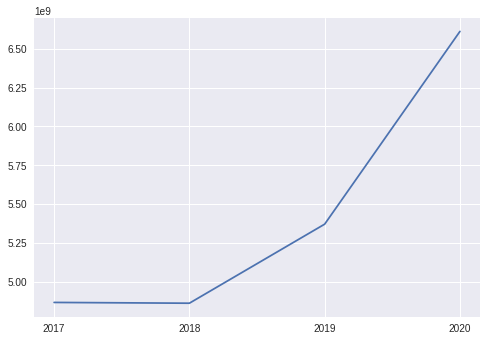

In [ ]:
cashflow_dict = {'index':[0,1,2,3], 'period': ['2020', '2019', '2018', '2017'], 'cashflow':[last_year_cash,two_year_cash,three_year_cash,four_year_cash]}
    
   # 'ttm': ttm_cash, '2020': last_year_cash, '2019': two_year_cash, '2018': three_year_cash, '2017': four_year_cash}
cashflow_dataframe = pd.DataFrame.from_dict(cashflow_dict)
cashflow_dataframe = cashflow_dataframe.sort_values(by= 'index', ascending=False)
plt.plot(cashflow_dataframe.period, cashflow_dataframe.cashflow)

In [ ]:
dividend = ticker.info['dividendRate']
print(dividend)

5.92


In [ ]:
pip install fpdf2

In [ ]:
from fpdf import FPDF

In [ ]:
earnings_df = ticker.earnings
earnings_list = list(ticker.earnings['Earnings'])
print(earnings_list)
eps_est_list = [earnings_list[0] / shares_outstanding, earnings_list[1] / shares_outstanding, earnings_list[2] / shares_outstanding]
print(eps_est_list)

[4858000000, 5349000000, 4570000000, 5384000000]
[8.39557696810574, 9.244121284972746, 7.8978564726725455]


In [ ]:
total_assets_list = list(bal_sheet.loc['Total Assets'])
liability_list = list(bal_sheet.loc['Total Liab'])
Shareholdr_equity_list = [total_assets_list[0]-liability_list[0], total_assets_list[1]-liability_list[1], total_assets_list[2]-liability_list[2], total_assets_list[3]-liability_list[3]]

print(total_assets_list)
print(liability_list)
print(Shareholdr_equity_list)

[47344000000.0, 44659000000.0, 36500000000.0, 37987000000.0]
[34413000000.0, 34533000000.0, 26652000000.0, 26365000000.0]
[12931000000.0, 10126000000.0, 9848000000.0, 11622000000.0]


In [ ]:
dividend_rate = str(ticker.info['dividendRate'])
divident_yield = str(ticker.info['dividendYield'])

In [ ]:
from datetime import date
today = str(date.today())
current_year = date.today().year
print(current_year)

2021




```
# This is formatted as code
```

# Data Conversions

In [ ]:
current_priceSTR= str(ticker.info['currentPrice'])
gross_margin_current = f"{gross_margin:.2%}"
gross_margin_hist = []
for i in gross_margins_list:
  gross_margin_hist.append(f"{i:.2%}")

print(gross_margin_hist)

gross_marginSTR= ', '.join(map(str, gross_margin_hist))
  
print(gross_marginSTR)

['48.74%', '47.92%', '49.17%', '49.56%']
48.74%, 47.92%, 49.17%, 49.56%


In [ ]:
years = [current_year - 1,current_year - 2, current_year - 3,current_year - 4]

def merge(list1, list2):
      
    merged_list = tuple(zip(list1, list2)) 
    return merged_list
      
# Driver code

gross_margin_tuples = (merge(years, gross_margin_hist))
SGA_Ratio_tuples = (merge(years,SGA_Ratio))
research_ratio_tuples = merge(years,research_ratio)
cashflow_growth = merge(years,cashflow_growth_rate)
gross_profit_merge = merge(years,gross_profit_list)
print(cashflow_growth)

((2020, 0.23105566933531932), (2019, 0.10468942821883999), (2018, -0.001027326895418122))


In [ ]:
# create DataFrame using data
def tuples_to_df(tuple):
  new_df = pd.DataFrame(tuple, columns =['Years', 'Measure'])
  return new_df
  

sga_df = tuples_to_df(SGA_Ratio_tuples)
research_df = tuples_to_df(research_ratio_tuples)
research_df.Measure = (research_df.Measure * 100).round(decimals=2)
gross_margin_df = tuples_to_df(gross_margin_tuples)
cashflow_growth_df = tuples_to_df(cashflow_growth).round(decimals=2)
grossprofit_df = tuples_to_df(gross_profit_merge).round(decimals=2)

grossprofit_df

,Years,Measure
0,2020,1.568500e+10
1,2019,1.540000e+10
2,2018,1.611000e+10
3,2017,1.568800e+10


In [ ]:

sga_df

,Years,Measure
0,2020,0.430411
1,2019,0.414935
2,2018,0.405152
3,2017,0.413883


# Charts and Tables

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
plt.style.use('seaborn')

In [ ]:
gross_margin_df = gross_margin_df.sort_index(ascending=False)

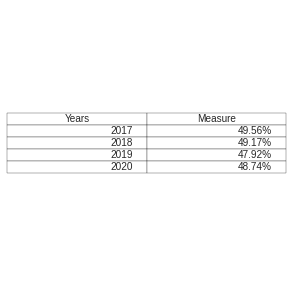

In [ ]:
fig, ax =plt.subplots(figsize=(5,5))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText = gross_margin_df.values,colLabels=sga_df.columns,loc='center')

plt.savefig('sgaTbl.png')

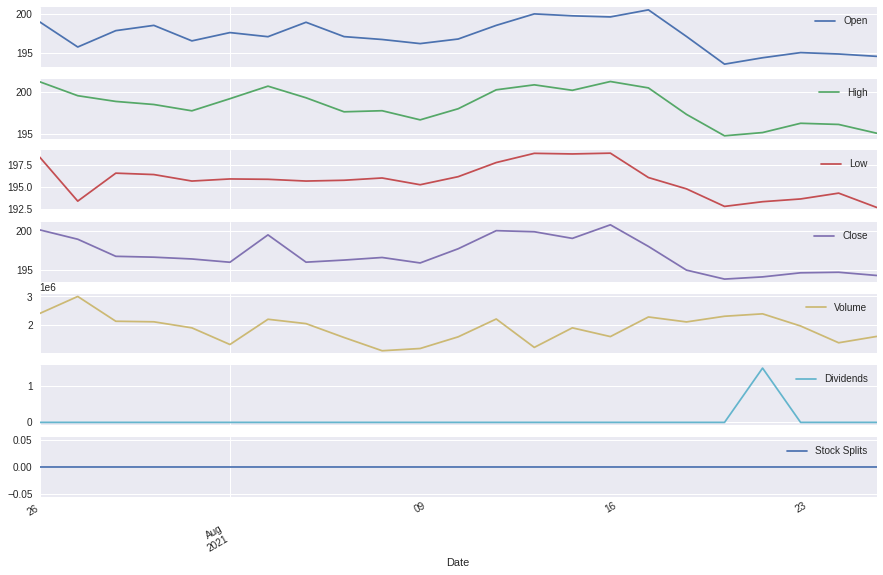

In [ ]:
ticker_hist = ticker.history()
fig2 = ticker_hist.plot(kind = 'line',figsize = (15,10), subplots=True);
plt.savefig('history plot.png')

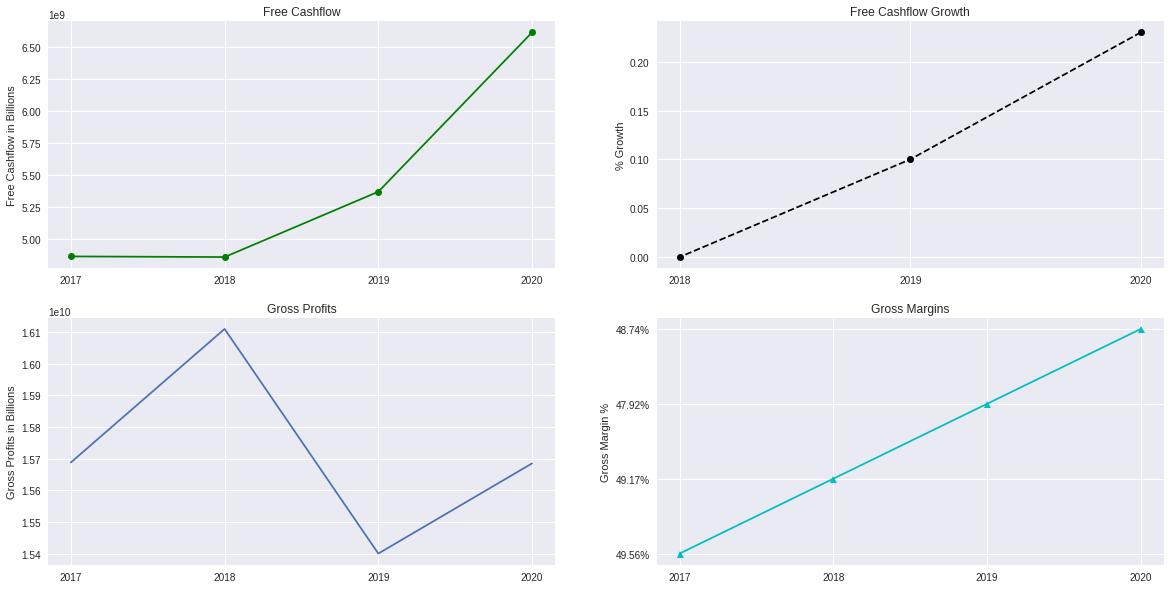

In [ ]:
fig1 = plt.figure(1,figsize= (20,10))

free_cash_plot = fig1.add_subplot(221)
free_cash_growth = fig1.add_subplot(222)
gross_margin_growth = fig1.add_subplot(224)
gross_profit_chart = fig1.add_subplot(223)

free_cash_plot.plot(cashflow_dataframe.period, cashflow_dataframe.cashflow, 'go-')
free_cash_plot.set_ylabel('Free Cashflow in Billions')
free_cash_plot.set_title('Free Cashflow')

free_cash_growth.plot(cashflow_growth_df.Years, cashflow_growth_df.Measure, 'ko--')
free_cash_growth.xaxis.set_major_locator(MaxNLocator(integer=True))
free_cash_growth.set_ylabel('% Growth')
free_cash_growth.set_title('Free Cashflow Growth')

gross_margin_growth.plot(gross_margin_df.Years, gross_margin_df.Measure, 'c^-')
gross_margin_growth.xaxis.set_major_locator(MaxNLocator(integer=True))
gross_margin_growth.set_ylabel('Gross Margin %')
gross_margin_growth.set_title('Gross Margins')


gross_profit_chart.plot(grossprofit_df.Years, grossprofit_df.Measure)
gross_profit_chart.xaxis.set_major_locator(MaxNLocator(integer=True))
gross_profit_chart.set_ylabel('Gross Profits in Billions')
gross_profit_chart.set_title('Gross Profits')
plt.show()

fig1.savefig('profits and cash.png')



In [ ]:
logo = ticker.info['logo_url']
print(logo)

https://logo.clearbit.com/3m.com


In [ ]:
class PDF(FPDF):
  def header (self):
    self.set_font('Arial', 'B', 15)
    self.cell(0,10,'Stock Analysis for ' + ticker.info['longName'],1,1,'L')
    self.cell(0,10, 'Date:  ' + today)
    self.ln(20)
  
  def footer (self):
    self.set_y(-15)
    self.set_font('Arial', 'I', 8)
    self.cell(0,10, 'Page ' + str(self.page_no()) + '/{nb}', 0, 0, 'c')
    


pdf = PDF()
pdf.alias_nb_pages()
pdf.set_auto_page_break(auto=True, margin = 15)
# Cover Page
pdf.add_page()
pdf.set_font('helvetica', '', 16)
pdf.cell(0,10, 'Current Price:  ' + current_priceSTR,ln=1)
pdf.cell(0,10,'Gross Margins:  ' + gross_margin_current,ln=1)
pdf.cell(0,10,'Past Gross Margins:  ' + gross_marginSTR ,ln=1)
pdf.cell(0,10,'Dividend Rate:  ' + dividend_rate +'    Dividend Yield:  ' + divident_yield,ln=1)
#pdf.image('sgaTbl.png',5,75,100,title='SGA Ratio')
pdf.image('profits and cash.png',5,85,200)
pdf.image('history plot.png', 5, 175,200)
#Page 2
pdf.add_page()
pdf.cell(0,0,'Adding a new page')
pdf.output('stock pdf ' +ticker.info['longName'] + '.pdf')


/usr/local/lib/python3.7/dist-packages/fpdf/fpdf.py:1204: UserWarning: Substituting font arial by core font helvetica
  f"Substituting font {family} by core font "


# Discounted Free Cashflow Model